In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dem_votes_potus_12_16 = pd.read_feather('datasets/dem_votes_potus_12_16.feather')
display(dem_votes_potus_12_16.head())


,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546


     state    county  dem_percent_12  dem_percent_16      diff
0  Alabama   Bullock       76.305900       74.946921  1.358979
1  Alabama   Chilton       19.453671       15.847352  3.606319
2  Alabama      Clay       26.673672       18.674517  7.999155
3  Alabama   Cullman       14.661752       10.028252  4.633500
4  Alabama  Escambia       36.915731       31.020546  5.895185
6.829312660106834
5.040139140132316


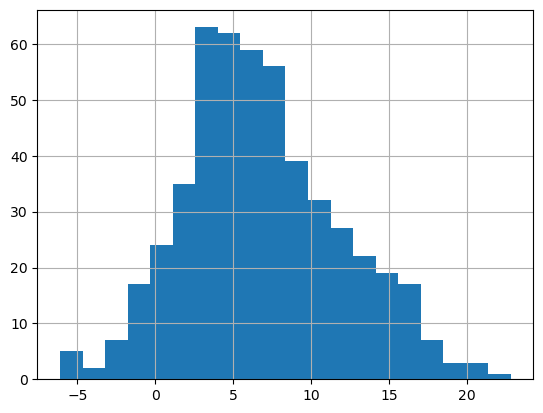

In [8]:
#######################
#paired t test
#######################

sample_dem_data = dem_votes_potus_12_16
sample_dem_data["diff"] = sample_dem_data["dem_percent_12"] - sample_dem_data["dem_percent_16"]
print(sample_dem_data.head())

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff)

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print xbar_diff
print(s_diff)

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

#the majority of the histogram lies to the right of zero.

In [12]:
###################
#Using ttest()
###################
alpha =0.01
#you'll explore the difference between the proportion of county-level votes 
#for the Democratic candidate in 2012 and 2016 
#to identify if the difference is significant. 
#The hypotheses are as follows:

#H0: The proportion of democratic votes in 2012 and 2016 were the same. 
#HA: The proportion of democratic votes in 2012 and 2016 were different.

#Conduct a t-test on the sample differences
#!pip install pingouin
import pingouin
test_results = pingouin.ttest( x=sample_dem_data['diff'], 
                               y=0, 
                               alternative = "two-sided")
print(test_results)

#p_value <<<< alpha
#Reject the null hypothesis in favor of the alternative hypothesis
#he proportion of democratic votes in 2012 and 2016 were different.


                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


In [13]:
test_results = pingouin.ttest( x=sample_dem_data["dem_percent_12"], 
                               y=sample_dem_data["dem_percent_16"], 
                               paired=True, 
                               alternative = "two-sided")
print(test_results)

#Using .ttest() avoid manual calculation to run the test. 
#When you have paired data, a paired t-test is preferable to the unpaired version 
#because it reduces the chance of a false negative error.
#p_value much bigger when unpaired


                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


In [19]:
#Wilcoxon signed-rank test
#difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 
#to identify if the difference is significant.

print(sample_dem_data.shape)
import pingouin

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data["dem_percent_12"],
                                    y=sample_dem_data["dem_percent_16"],
                                    paired=True,
                                    alternative='two-sided') 

# Print paired t-test results
display(paired_test_results)

# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data["dem_percent_12"],
                                    y=sample_dem_data["dem_percent_16"],
                                    alternative='two-sided') 

# Print Wilcoxon test results
print(wilcoxon_test_results)


# Given the large sample size (500), you obtained similar results here 
#between the parametric t-test and non-parametric Wilcoxon test with a very small p-value.


(500, 5)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


           W-val alternative         p-val       RBC      CLES
Wilcoxon  2401.0   two-sided  1.780396e-77  0.961661  0.644816
